# **Data Quality**

### **Dependencies**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from importlib.machinery import SourceFileLoader
CONSTANTS = SourceFileLoader("CONSTANTS", "../../config/CONSTANTS.py").load_module()

## **Load Data**

In [52]:
df = pd.read_csv("../../src/merged_orgas.csv")

In [53]:
df.head()

,iati_id,iati_orga_id,orga_abbreviation,orga_full_name,client,title_en,title_other,title_main,organization,country_code_list,...,actual_end,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,docs,title_and_description,sgd_pred_code,sgd_pred_str
0,DE-1-201822287-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Strengthening quality infrastructure for trade...,Stärkung der Qualitätsinfrastruktur für den Ha...,Strengthening quality infrastructure for trade...,Bundesministerium für wirtschaftliche Zusammen...,NaN,...,2016-03-14T00:00:00Z,2024-02-29T00:00:00Z,33130;,Regional trade agreements (RTAs);,331;,Trade Policies & Regulations;,NaN,Strengthening quality infrastructure for trade...,9,"8 9. Build resilient infrastructure, promot..."
1,DE-1-201920016-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Strengthening of Metrology for the Improvement...,Stärkung des Messwesens in Ägypten zur Verbess...,Strengthening of Metrology for the Improvement...,Bundesministerium für wirtschaftliche Zusammen...,['AG'],...,2016-03-14T00:00:00Z,2024-02-29T00:00:00Z,14010;,Water sector policy and administrative managem...,140;,Water Supply & Sanitation;,NaN,Strengthening of Metrology for the Improvement...,8,"7 8. Promote sustained, inclusive and susta..."
2,DE-1-201721877-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Strengthening regional integration and coopera...,Stärkung der regionalen Integration und Zusamm...,Strengthening regional integration and coopera...,Bundesministerium für wirtschaftliche Zusammen...,NaN,...,2016-03-14T00:00:00Z,2024-02-29T00:00:00Z,33130;,Regional trade agreements (RTAs);,331;,Trade Policies & Regulations;,NaN,Strengthening regional integration and coopera...,9,"8 9. Build resilient infrastructure, promot..."
3,DE-1-201276351-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Strengthening Non-Violent Popular Movements in...,Kapazitätsentwicklung für gewaltfreie Basisbew...,Strengthening Non-Violent Popular Movements in...,Bundesministerium für wirtschaftliche Zusammen...,['VU'],...,2016-03-14T00:00:00Z,2024-03-20T00:00:00Z,15160;,Human rights;,151;,Government & Civil Society-general;,NaN,Strengthening Non-Violent Popular Movements in...,10,9 10. Reduce inequality within and among co...
4,DE-1-201676584-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Rebuilding Further Arts after cyclone,Wiederaufbau von Further Arts nach Wirbelsturm,Rebuilding Further Arts after cyclone,Bundesministerium für wirtschaftliche Zusammen...,['VU'],...,2016-03-14T00:00:00Z,2024-03-20T00:00:00Z,73010;,Immediate post-emergency reconstruction and re...,730;,Reconstruction Relief & Rehabilitation;,NaN,Rebuilding Further Arts after cyclone. Rebuild...,15,"14 15. Protect, restore and promote sustain..."


In [54]:
df.columns

Index(['iati_id', 'iati_orga_id', 'orga_abbreviation', 'orga_full_name',
       'client', 'title_en', 'title_other', 'title_main', 'organization',
       'country_code_list', 'country', 'country_name', 'country_flag',
       'region', 'location', 'description_en', 'description_other',
       'description_main', 'status', 'planned_start', 'actual_start',
       'planned_end', 'actual_end', 'last_update', 'crs_5_code', 'crs_5_name',
       'crs_3_code', 'crs_3_name', 'docs', 'title_and_description',
       'sgd_pred_code', 'sgd_pred_str'],
      dtype='object')

In [55]:
from importlib.machinery import SourceFileLoader
CONSTANTS = SourceFileLoader("CONSTANTS", "../../config/CONSTANTS.py").load_module()

# Merge all organization csv's
def merge_responses():
    combined_df = pd.DataFrame()

    for key, values in CONSTANTS.ORGANIZATIONS.items():
        path = f"../../src/responses/response_{values[1]}.json"

        temp_df = pd.read_json(path)


        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

    return combined_df

responses_df = merge_responses()
responses_df.head(5)

,sector_code,iati_identifier,title_narrative,reporting_org_ref,sector_vocabulary,activity_date_type,activity_status_code,description_narrative,last_updated_datetime,participating_org_ref,...,activity_date_iso_date,reporting_org_narrative,title_narrative_xml_lang,participating_org_narrative,description_narrative_xml_lang,contact_info_organisation_narrative,recipient_country_code,location_name_narrative,document_link_url,contact_info_department_narrative
0,[33130],DE-1-201822287-0,[Strengthening quality infrastructure for trad...,DE-1,[1],"[1, 2, 3]",2,[Enhances the efficiency of the SADC Directora...,2024-02-29T00:00:00Z,[DE-1],...,"[2020-01-01T00:00:00Z, 2020-01-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]","[Physikalisch-Technische Bundesanstalt (PTB), ...",NaN,NaN,NaN,NaN
1,[33130],DE-1-201022094-0,[Strengthening quality infrastructure for trad...,DE-1,[1],"[1, 2, 3, 4]",4,[For the domestic markets of the Member States...,2024-02-29T00:00:00Z,[DE-1],...,"[2010-07-01T00:00:00Z, 2010-07-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]","[Physikalisch-Technische Bundesanstalt (PTB), ...",NaN,NaN,NaN,NaN
2,[33130],DE-1-201222975-0,[Strengthening quality infrastructure for trad...,DE-1,[1],"[1, 2, 3, 4]",4,[The Southern African Development Community (S...,2024-02-29T00:00:00Z,[DE-1],...,"[2013-09-01T00:00:00Z, 2013-09-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]","[Physikalisch-Technische Bundesanstalt (PTB), ...",NaN,NaN,NaN,NaN
3,[33130],DE-1-201522135-0,[Increase in Trade and Consumer Protection in ...,DE-1,[1],"[1, 2, 3, 4]",4,[The SADC Protocol on Trade forms the legal ba...,2024-02-29T00:00:00Z,[DE-1],...,"[2017-01-01T00:00:00Z, 2017-01-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]","[Physikalisch-Technische Bundesanstalt (PTB), ...",NaN,NaN,NaN,NaN
4,[14010],DE-1-201920016-0,[Strengthening of Metrology for the Improvemen...,DE-1,[1],"[1, 2, 3]",2,[With a rapidly growing population and a promi...,2024-02-29T00:00:00Z,[DE-1],...,"[2022-05-01T00:00:00Z, 2022-05-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]",[Bundesministerium für wirtschaftliche Zusamme...,[AG],[Saint John's],NaN,NaN


## **Title & Description Narrative**

In [56]:
df['description_length'] = df['description_main'].apply(lambda x: len(x.split(" ")) if isinstance(x, str) else 0)
df['title_length'] = df['title_main'].apply(lambda x: len(x.split(" ")) if isinstance(x, str) else 0)

In [57]:
grouped = df.groupby('client')['description_length'].apply(list)

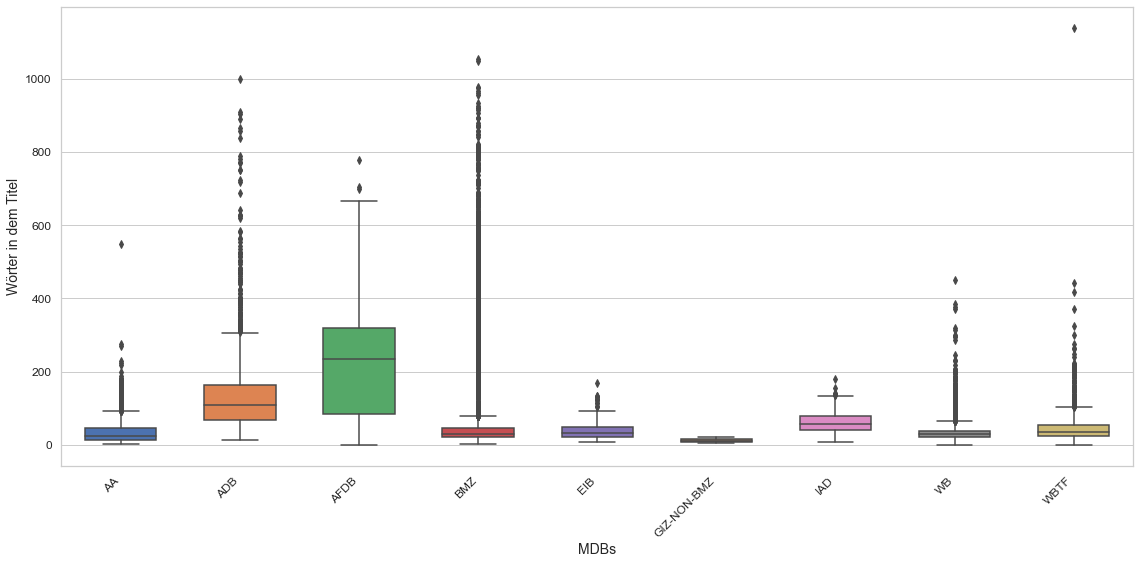

In [58]:
sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))

# Creating the boxplot with seaborn for a more modern look and better default aesthetics
ax = sns.boxplot(data=grouped, linewidth=1.5, width=0.6, fliersize=5, saturation=1)
ax.set_xticklabels(grouped.keys(), rotation=45, horizontalalignment='right')


# Customizing colors
palette = sns.color_palette("Set1", len(grouped))
for i, box in enumerate(ax.artists):
    box.set_edgecolor(palette[i])
    box.set_facecolor(sns.utils.desaturate(palette[i], 0.75))
    # Setting the color for the whiskers
    for j in range(6*i, 6*(i+1)):
        ax.lines[j].set_color(palette[i])

# Enhancing readability and aesthetics
#plt.title('Boxplot of Description Length by Client', fontsize=18, fontweight='bold')
plt.ylabel('Wörter in dem Titel', fontsize=14)
plt.xlabel('MDBs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#ax.set_facecolor('#f5f5f5')
#plt.setp(ax.artists, edgecolor = 'k', facecolor='#f6f6f6')
#plt.setp(ax.lines, color='k')


# Display the plot
plt.tight_layout()

plt.savefig('../../src/analysis/words_distr_descr.png')
plt.show()

In [59]:
grouped = df.groupby('client')['title_length'].apply(list)

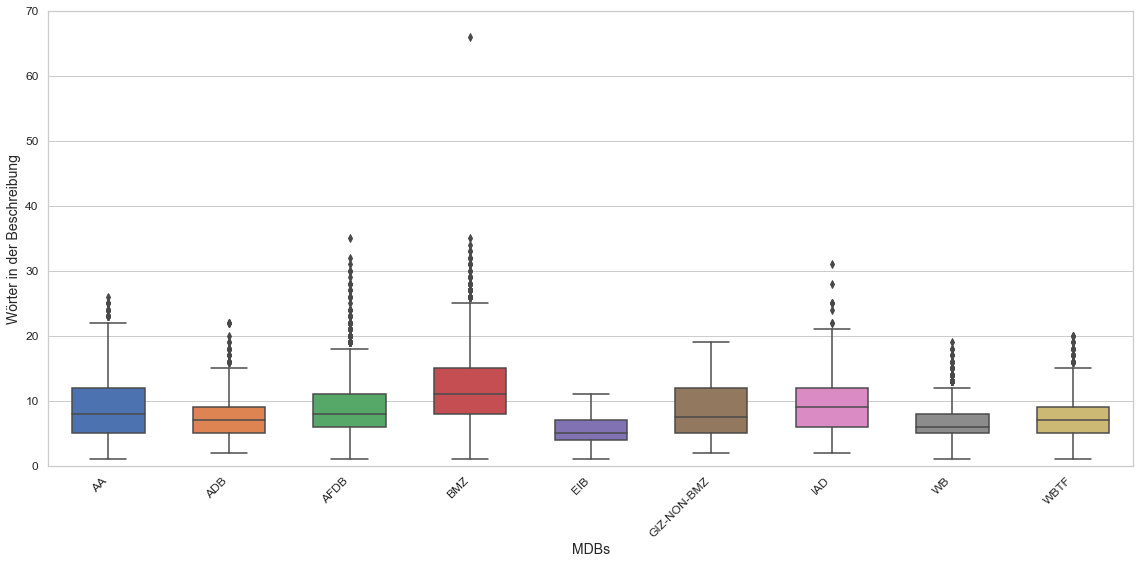

In [60]:
sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))

# Creating the boxplot with seaborn for a more modern look and better default aesthetics
ax = sns.boxplot(data=grouped, linewidth=1.5, width=0.6, fliersize=5, saturation=1)
ax.set_xticklabels(grouped.keys(), rotation=45, horizontalalignment='right')


# Customizing colors
palette = sns.color_palette("Set1", len(grouped))
for i, box in enumerate(ax.artists):
    box.set_edgecolor(palette[i])
    box.set_facecolor(sns.utils.desaturate(palette[i], 0.75))
    # Setting the color for the whiskers
    for j in range(6*i, 6*(i+1)):
        ax.lines[j].set_color(palette[i])

# Enhancing readability and aesthetics
#plt.title('Boxplot of Description Length by Client', fontsize=18, fontweight='bold')
plt.ylabel('Wörter in der Beschreibung', fontsize=14)
plt.xlabel('MDBs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#ax.set_facecolor('#f5f5f5')
#plt.setp(ax.artists, edgecolor = 'k', facecolor='#f6f6f6')
#plt.setp(ax.lines, color='k')
ax.set_ylim(bottom=0, top=70)

# Display the plot
plt.tight_layout()

plt.savefig('../../src/analysis/words_distr_title.png')
plt.show()

## **Nan-Value Analysis**

In [61]:
IATI_ATTRIBUTES = [
    "iati_identifier",
    "title_narrative",
    "title_narrative_xml_lang",
    "reporting_org_ref",
    "description_narrative_xml_lang",
    "description_narrative",
    "recipient_country_code",
    "recipient_region_code",
    "activity_status_code",
    "last_updated_datetime",
    "sector_code",
    "sector_vocabulary",
]

# Filter the list of columns to those that exist in responses_df
filtered_columns = [col for col in IATI_ATTRIBUTES if col in responses_df.columns]

# Filter the DataFrame to keep only the columns in filtered_columns
responses_df = responses_df[filtered_columns]

In [62]:
responses_df = responses_df.applymap(lambda x: np.nan if x == [] or x == '' else x)

nan_counts = responses_df.isna().sum()
nan_counts

iati_identifier                       0
title_narrative                       0
title_narrative_xml_lang           8758
reporting_org_ref                     0
description_narrative_xml_lang     8759
description_narrative                90
recipient_country_code            10863
recipient_region_code             43073
activity_status_code                  0
last_updated_datetime                 0
sector_code                          22
sector_vocabulary                    22
dtype: int64

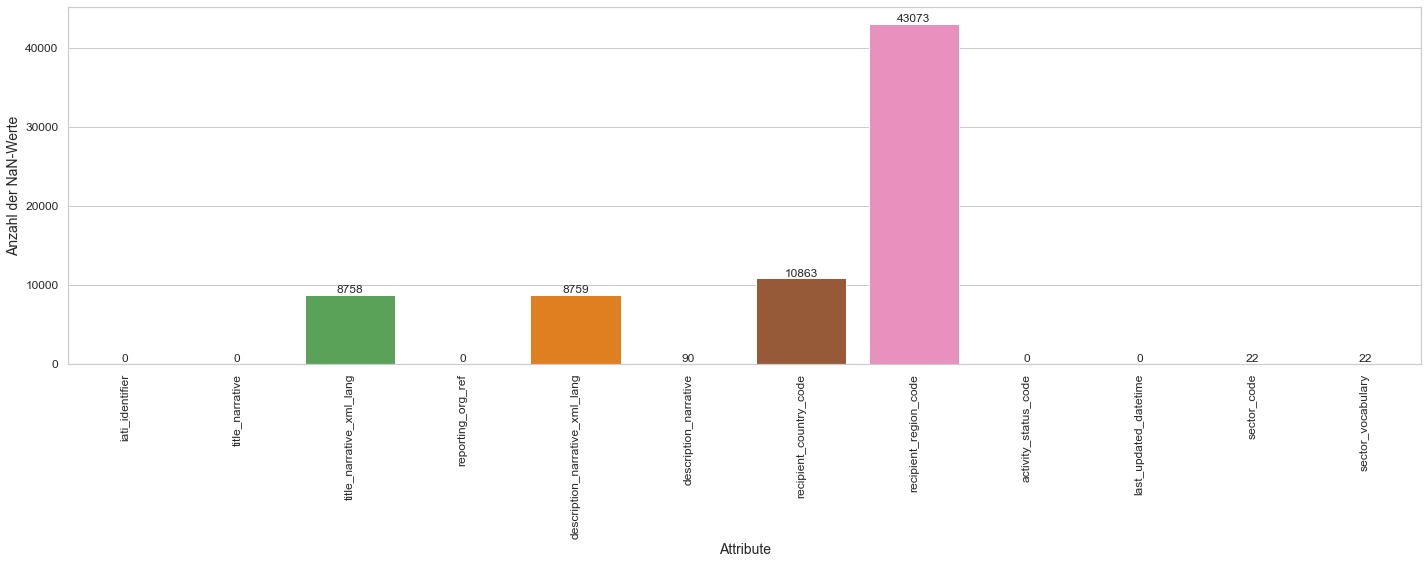

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x=nan_counts.index, y=nan_counts.values, palette="Set1")
#plt.title('Count of NaN Values Per Column with Seaborn')
plt.xlabel('Attribute', fontsize=14)
plt.ylabel('Anzahl der NaN-Werte', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Loop through the bars and add text annotations
for index, value in enumerate(nan_counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')

plt.tight_layout()

plt.savefig('../../src/analysis/nan_values.png')
plt.show()

## **Sector Vocabulary**

In [64]:
responses_df["sector_vocabulary"]

0                            [1]
1                            [1]
2                            [1]
3                            [1]
4                            [1]
                  ...           
53965                        [1]
53966                        [1]
53967                        [1]
53968    [1, 10, 10, 10, 10, 10]
53969                        [1]
Name: sector_vocabulary, Length: 53970, dtype: object

In [65]:
codes = {
    "1": 0,
    "2": 0,
    "10": 0
    }

In [66]:
count = 0
index = 0
orgas_without_crs5 = []

for sector_list in responses_df["sector_vocabulary"].dropna():  # Dropping NaN values before iteration
    index += 1
    if "1" not in sector_list:
        count += 1
        orgas_without_crs5.append(responses_df.iloc[index]["reporting_org_ref"])

orgas_without_crs5


['XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3

In [68]:
from collections import Counter

# Assuming orgas_without_crs5 is your list
orgas_without_crs5_counts = Counter(orgas_without_crs5)

# If you need to display this in a more readable format or use it similarly to pandas' value_counts:
for org_ref, count in orgas_without_crs5_counts.items():
    print(f"{org_ref}: {count}")

XM-DAC-918-3: 721
44000: 725
